# 1. Imports and Load Preprocessed Data

In [1]:
# clustering_iris.py

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_iris
import numpy as np

# Load Iris dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target
df['species_name'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# Normalize features (Min-Max scaling)
scaler = MinMaxScaler()
features = iris.feature_names
df[features] = scaler.fit_transform(df[features])


# Explanation:
* Loads Iris dataset.
* Normalizes features for K-Means clustering.
* Keeps original class labels for comparison.

# 2. K-Means Clustering (k=3)

In [2]:
# Fit K-Means with k=3
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster_3'] = kmeans.fit_predict(df[features])

# Compare clusters with actual species using Adjusted Rand Index (ARI)
ari_3 = adjusted_rand_score(df['species'], df['cluster_3'])
print(f"Adjusted Rand Index (k=3): {ari_3:.3f}")


Adjusted Rand Index (k=3): 0.701


# Explanation:
* n_clusters=3 because Iris has 3 species.
* ARI measures similarity between predicted clusters and true labels (1 = perfect, 0 = random).

# 3. Experiment: k=2 and k=4, Elbow Curve

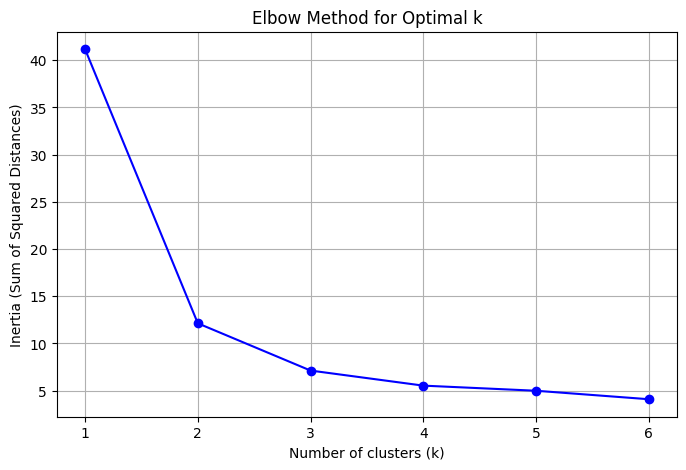

In [3]:
# Compute inertia for different k values
inertia = []
K = range(1, 7)
for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(df[features])
    inertia.append(km.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(8,5))
plt.plot(K, inertia, 'bo-')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia (Sum of Squared Distances)")
plt.title("Elbow Method for Optimal k")
plt.xticks(K)
plt.grid(True)
plt.savefig("kmeans_elbow_curve.png")
plt.show()


# Explanation:
* Tests K-Means for k = 1 to 6.
* Inertia = sum of squared distances of points to their cluster centers.
* Elbow point indicates optimal k.

# Compute ARI for k=2 and k=4

In [4]:
# ARI for k=2
df['cluster_2'] = KMeans(n_clusters=2, random_state=42).fit_predict(df[features])
ari_2 = adjusted_rand_score(df['species'], df['cluster_2'])

# ARI for k=4
df['cluster_4'] = KMeans(n_clusters=4, random_state=42).fit_predict(df[features])
ari_4 = adjusted_rand_score(df['species'], df['cluster_4'])

print(f"Adjusted Rand Index (k=2): {ari_2:.3f}")
print(f"Adjusted Rand Index (k=4): {ari_4:.3f}")


Adjusted Rand Index (k=2): 0.568
Adjusted Rand Index (k=4): 0.621


# Explanation:
* Allows comparison of clustering quality for different k values.
* ARI helps justify why k=3 is appropriate.

# 4. Visualize Clusters (Petal Length vs Width)

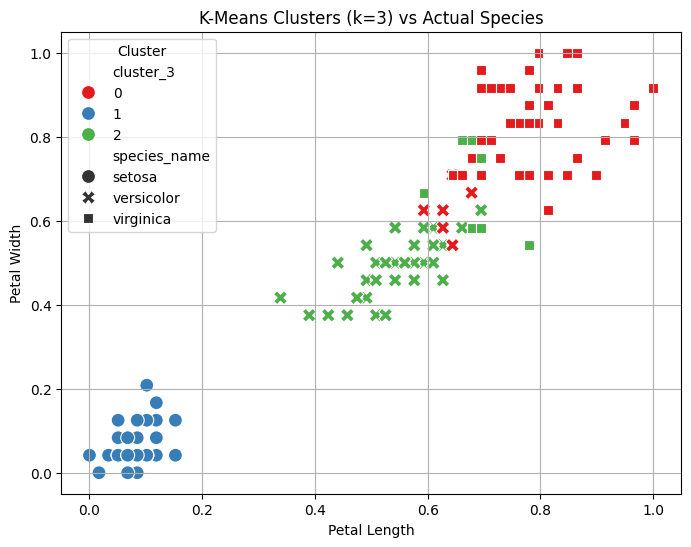

In [5]:
# Scatter plot for clusters (k=3)
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x='petal length (cm)',
    y='petal width (cm)',
    hue='cluster_3',
    palette='Set1',
    style='species_name',  # optional to show actual labels
    s=100
)
plt.title("K-Means Clusters (k=3) vs Actual Species")
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend(title="Cluster")
plt.grid(True)
plt.savefig("kmeans_clusters_scatter.png")
plt.show()


# Explanation:
* Scatter plot shows clusters in 2D feature space.
* Coloring by cluster and shape by species helps identify misclassifications.

# 5. Analysis 
* Cluster Quality: ARI shows how closely clusters match actual species.
* Misclassifications: Petal features usually separate species well; Sepal features may cause some overlap.
* Optimal k: Elbow curve justifies k=3.
* Real-world applications: Customer segmentation, market basket analysis, or grouping similar items.

